Maximum of setosa: 1.9.
Minimum of others: 3.0.


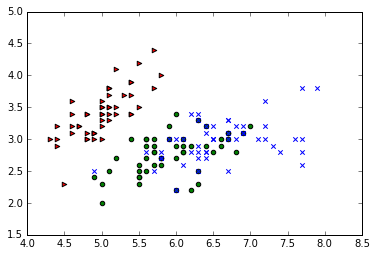

In [4]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Load data from sklearn
data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
target_names = data['target_names']
labels = target_names[target]
for t,marker,c in zip(xrange(3),">ox","rgb"):
    # Color as class
    plt.scatter(features[target == t,0],
                features[target == t,1],
                marker=marker,c=c)

plength = features[:, 2]
is_setosa = (labels == 'setosa')
max_setosa =plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

def apply_model( example ):
    if example[2] < 2:
        print 'Iris Setosa'
    else:
        print 'Iris Virginica or Iris Versicolor'

features = features[~is_setosa]
labels = labels[~is_setosa]
virginica = (labels == 'virginica')
        
best_acc = -1.0
best_fi = -1.0
best_t = -1.0
for fi in xrange(features.shape[1]) :
    # 各特徴量ごとに閾値の候補を生成する
    thresh = features[:, fi].copy() thresh.sort()
    # 全ての閾値でテストする for t in thresh:
    pred = (features[:,fi] > t)
    acc = (labels[pred] == 'virginica').mean()
    if acc > best_acc:
        best_acc = acc
        best_fi = fi
        best_t = t
    
    
    
    
    
    
    

Model parameters: [   2.59619213  989.02487106]
Approximation error: [  3.17389767e+08]
Model f1's error:	317389767.34
Model f2's error:	179983507.878
Model f3's error:	139350144.032
Model f10's error:	121942326.364
Model f20's error:	110527733.742


/Users/ymkjp/.pyenv/versions/anaconda2-2.5.0/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


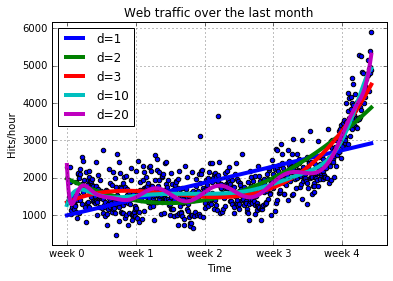

/Users/ymkjp/.pyenv/versions/anaconda2-2.5.0/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:59: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ymkjp/.pyenv/versions/anaconda2-2.5.0/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:60: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ymkjp/.pyenv/versions/anaconda2-2.5.0/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ymkjp/.pyenv/versions/anaconda2-2.5.0/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ymkjp/.pyenv/versions/anaconda2-2.5.0/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may

Error inflection=132950348.197616
Error d=1:	6397694.38639
Error d=2:	6010775.40124
Error d=3:	6047678.65853
Error d=10:	7037704.82069
Error d=20:	6953859.49595
100,000 hits/hour expected at week 9.616071


In [3]:
%matplotlib inline
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

def createModel(x, y, deg):
    fp = sp.polyfit(x, y, deg)
    return sp.poly1d(fp)

def error(f, x, y):
    return sp.sum((f(x)-y)**2)

sp.random.seed(3)  # to reproduce the data later on

data = sp.genfromtxt(u'./BuildingMachineLearningSystemsWithPython/ch01/data/web_traffic.tsv', delimiter="\t")
x = data[:,0]
y = data[:,1]
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, deg=1, full=True)

print("Model parameters: %s" % fp1)
print("Approximation error: %s" % residuals)

f1 = sp.poly1d(fp1)
    
f2 = createModel(x, y, deg=2)
f3 = createModel(x, y, deg=3)
f10 = createModel(x, y, deg=10)
f20 = createModel(x, y, deg=20)
print("Model f1's error:\t%s" % error(f1, x, y))
print("Model f2's error:\t%s" % error(f2, x, y))
print("Model f3's error:\t%s" % error(f3, x, y))
print("Model f10's error:\t%s" %  error(f10, x, y))
print("Model f20's error:\t%s" %  error(f20, x, y))

plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks(
    [w*7*24 for w in range(10)], 
    ['week %i'%w for w in range(10)])

fx = sp.linspace(0,x[-1], num=1000)

orders = []
for fn in [f1, f2, f3, f10, f20]:
    plt.plot(fx, fn(fx), linewidth=4)
    orders.append("d=%i" % fn.order)
    
plt.legend(orders, loc="upper left")
plt.autoscale(tight=True)
plt.grid()
plt.show()  # The wave stands for overfitting

inflection = 3.5*7*24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = createModel(xa, ya, 1)
fb = createModel(xb, yb, 1)

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))


frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

fbt1 = createModel(xb[train], yb[train], 1)
fbt2 = createModel(xb[train], yb[train], 2)
fbt3 = createModel(xb[train], yb[train], 3)
fbt10 = createModel(xb[train], yb[train], 10)
fbt20 = createModel(xb[train], yb[train], 20)

for f in [fbt1, fbt2, fbt3, fbt10, fbt20]:
    print("Error d=%s:\t%s" % (f.order, error(f, xb[test], yb[test])))


from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, 800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])
